In [2]:
import cv2, os, sys
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

## HLS,HSV,Lab,YUV,YCrCb

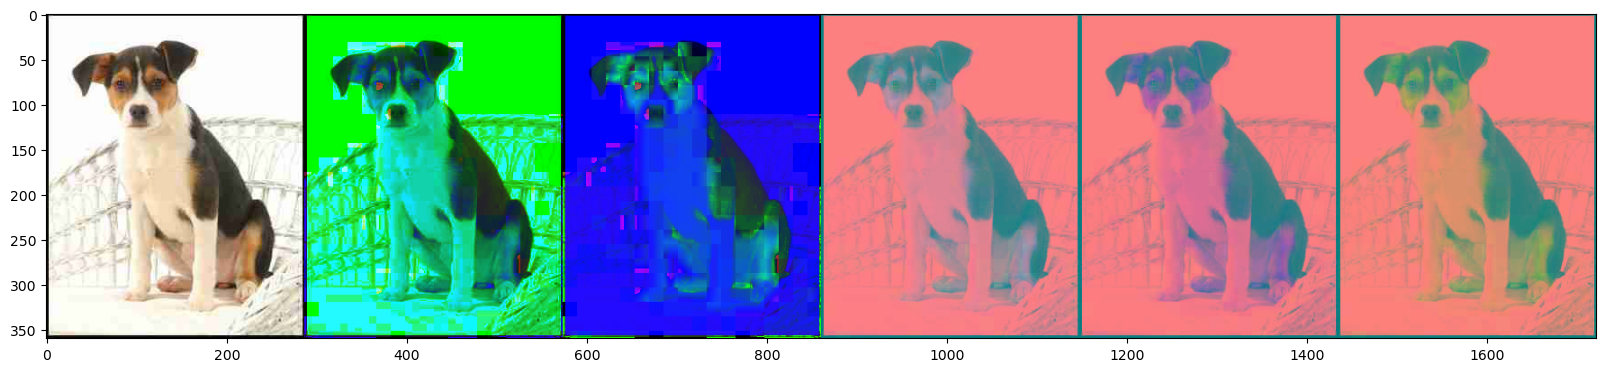

In [3]:
img_path = 'C:\\img\\dog193.jpg'
dog_bgr = cv2.imread(img_path)
dog_rgb = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2RGB)
dog_hls = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2HLS)
dog_hsv = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2HSV)
dog_lab = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2Lab)
dog_yuv = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2YUV)
dog_ycrc = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2YCrCb)
dog_concat = cv2.hconcat([dog_rgb,dog_hls,dog_hsv,dog_lab,dog_yuv,dog_ycrc])
plt.figure(figsize=(20,20))
plt.imshow(dog_concat)

## 2枚の画像をブレンド

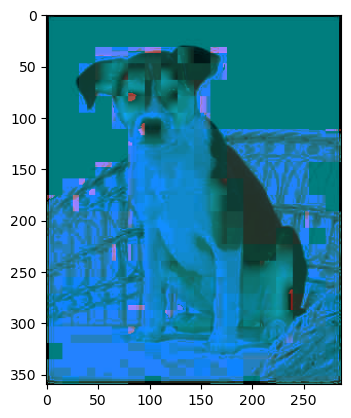

In [4]:
dog_blend = cv2.addWeighted(dog_hsv, 0.5,dog_hls, 0.5, gamma=0) 
plt.imshow(dog_blend)

## thresholdのthreshパラメータが0, 50, 128, 200の時の画像をそれぞれvconcatを使用して縦に並べて表示

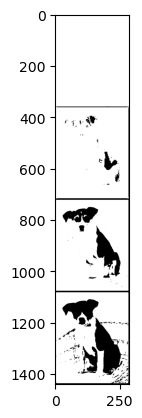

In [5]:
dog_gray = cv2.cvtColor(dog_bgr,cv2.COLOR_BGR2GRAY)
ret, dog_thresh0 = cv2.threshold(dog_gray, 0, 255, cv2.THRESH_BINARY)
ret, dog_thresh50 = cv2.threshold(dog_gray, 50, 255, cv2.THRESH_BINARY)
ret, dog_thresh128 = cv2.threshold(dog_gray, 128, 255, cv2.THRESH_BINARY)
ret, dog_thresh200 = cv2.threshold(dog_gray, 200, 255, cv2.THRESH_BINARY)
dog_vconcat = cv2.vconcat([dog_thresh0,dog_thresh50,dog_thresh128,dog_thresh200])
plt.imshow(dog_vconcat,cmap='gray')


## thresholdTypeパラメータをTHRESH_OTSU, THRESH_TRUNC, THRESH_TOZERO, THRESH_TOZERO_INVに変更し、それぞれの画像を行列の結合を以下のように並べて表示

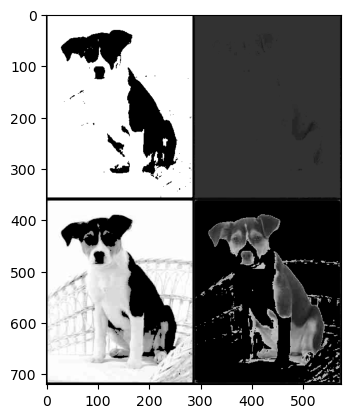

In [6]:
ret, dog_thresh1 = cv2.threshold(dog_gray, 0, 255, cv2.THRESH_OTSU)
ret, dog_thresh2 = cv2.threshold(dog_gray, 50, 255, cv2.THRESH_TRUNC)
ret, dog_thresh3 = cv2.threshold(dog_gray, 128, 255, cv2.THRESH_TOZERO)
ret, dog_thresh4 = cv2.threshold(dog_gray, 200, 255, cv2.THRESH_TOZERO_INV)
dog_vconcat1 = cv2.vconcat([dog_thresh1,dog_thresh3])
dog_vconcat2 = cv2.vconcat([dog_thresh2,dog_thresh4])
dog_final = cv2.hconcat([dog_vconcat1,dog_vconcat2])
plt.imshow(dog_final,cmap='gray')


## adaptiveThresholdを用いてadaptiveMethodがADAPTIVE_THRESH_GAUSSIAN_C,ADAPTIVE_THRESH_MEAN_Cの時の画像をそれぞれ表示

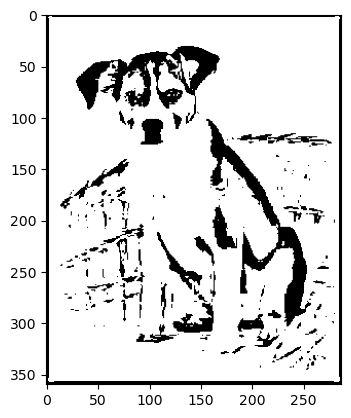

In [7]:
dog_ada_thresh1 = cv2.adaptiveThreshold(dog_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 51, 20)
dog_ada_thresh2 = cv2.adaptiveThreshold(dog_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 51, 20)
plt.imshow(dog_ada_thresh1,cmap = "gray" )


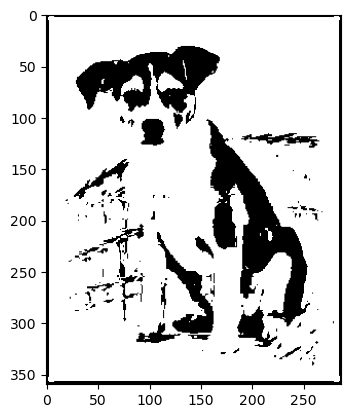

In [8]:
plt.imshow(dog_ada_thresh2,cmap = "gray" )

## threshold, gray, HSVの画像を行列の結合を用いて並べ、BGR画像とブレンドして表示

(360, 287) (360, 287) (360, 287, 3)


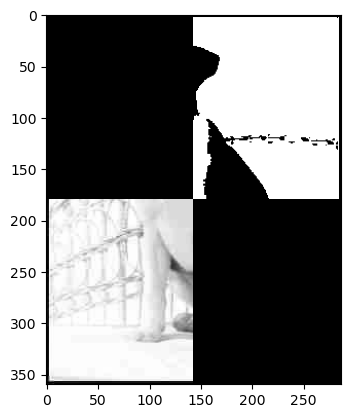

In [9]:
print(dog_gray.shape, dog_thresh200.shape,dog_hsv.shape)
base = np.zeros(shape=(360, 287), dtype=np.uint8)
base[:base.shape[0]//2, base.shape[1]//2:] = dog_thresh200[:dog_thresh200.shape[0]//2,dog_thresh200.shape[1]//2:]
base[base.shape[0]//2:,: base.shape[1]//2] = dog_gray[dog_gray.shape[0]//2:,:dog_gray.shape[1]//2]
#base[base.shape[0]//2:, base.shape[1]//2:] = dog_hsv[dog_hsv.shape[0]//2:,dog_hsv.shape[1]//2:]
plt.imshow(base, cmap='gray')

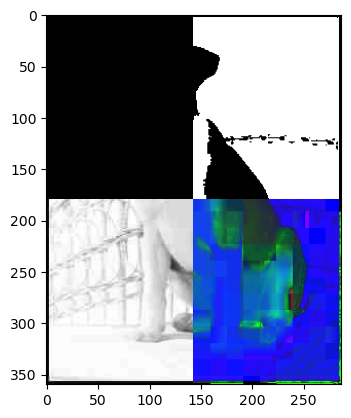

In [20]:
base1 = np.zeros(shape=(360, 287,3), dtype=np.uint8)
gray_3ch = np.stack((dog_gray,)*3, -1)
thresh_3ch = np.stack((dog_thresh200,)*3, -1)
base1[base1.shape[0]//2:,: base1.shape[1]//2] = gray_3ch[gray_3ch.shape[0]//2:,:gray_3ch.shape[1]//2]
base1[base1.shape[0]//2:, base1.shape[1]//2:] = dog_hsv[dog_hsv.shape[0]//2:,dog_hsv.shape[1]//2:]
base1[:base1.shape[0]//2, base1.shape[1]//2:] = thresh_3ch[:thresh_3ch.shape[0]//2,thresh_3ch.shape[1]//2:]
plt.imshow(base1,cmap = "gray")

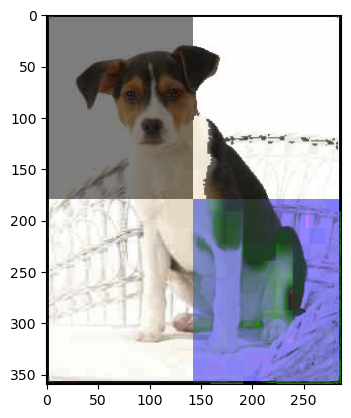

In [24]:
dog_blend1 = cv2.addWeighted(dog_rgb, 0.5,base1, 0.5, gamma=0) 
plt.imshow(dog_blend1)